In [1]:
import osmnx as ox
import networkx as nx
import sys
from geopy.distance import geodesic
import pandas as pd


def a_star(point1, point2, distance_func):

    # get the nearest nodes to the start and end points
    start_node = ox.distance.nearest_nodes(graph, point1[1], point1[0])
    end_node = ox.distance.nearest_nodes(graph, point2[1], point2[0])

    # run A* algorithm to find the shortest path
    path = nx.astar_path(graph, start_node, end_node, heuristic=distance_func, weight='length')

    # calculate the total distance of the path
    # total_distance = sum(graph[u][v]['length'] for u, v in zip(path[:-1], path[1:]))

    return path, 0

# define the distance function to use as the heuristic
def distance_func(u, v):
    point1 = (graph.nodes[u]['y'], graph.nodes[u]['x'])
    point2 = (graph.nodes[v]['y'], graph.nodes[v]['x'])
    return geodesic(point1, point2).meters




In [2]:
# create the points
point1 = 12.9246572, 77.5582014
point2 = 13.0110216, 77.6747875

# create the graph
graph = ox.graph_from_point(point1, dist=15000, network_type='drive')  


In [12]:
G = nx.DiGraph()
for u,v,data in graph.edges(data=True):
    w = data['length'] if 'length' in data else 0.0
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    else:
        G.add_edge(u, v, weight=w)

# print(G.edges(data=True)[5:10])
print(list(G.edges(data=True))[5:10])


[(248007842, 1083515076, {'weight': 31.714}), (248007842, 308468445, {'weight': 48.054}), (5354313543, 17327095, {'weight': 5.962}), (5354313543, 362454516, {'weight': 71.107}), (5354313543, 5354313544, {'weight': 132.035})]


In [11]:
G = nx.DiGraph()
for u,v,data in graph.edges(data=True):
    w = data['length'] if 'length' in data else 0.0
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    else:
        G.add_edge(u, v, weight=w)

# print(G.edges(data=True)[5:10])
print(list(G.edges(data=True)))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
L = list(G.edges(data=True))[5:10]
f = open('fileS1.txt', 'w')
for t in L :
    line = ' '.join(str(x) for x in t)
    f.write(line + '\n')
f.close()


file1 = open('fileS1.txt', 'r')
print(file1.read())
file1.close()

248007842 1083515076 {'weight': 31.714}
248007842 308468445 {'weight': 48.054}
5354313543 17327095 {'weight': 5.962}
5354313543 362454516 {'weight': 71.107}
5354313543 5354313544 {'weight': 132.035}



In [29]:
user = ['user_from', 'user_to', 'trust']
df = pd.read_csv('C:/Users/sumed/OneDrive/Documents/Sumedh/Majorproject/routing-serv/fileS1.txt', sep= ' ', names= user )
df.head()

,user_from,user_to,trust
248007842,1083515076,{'weight':,31.714}
248007842,308468445,{'weight':,48.054}
5354313543,17327095,{'weight':,5.962}
5354313543,362454516,{'weight':,71.107}
5354313543,5354313544,{'weight':,132.035}


In [30]:
G1 = nx.from_pandas_edgelist(df, source='user_from', target='user_to',edge_attr = 'trust', create_using= nx.DiGraph)

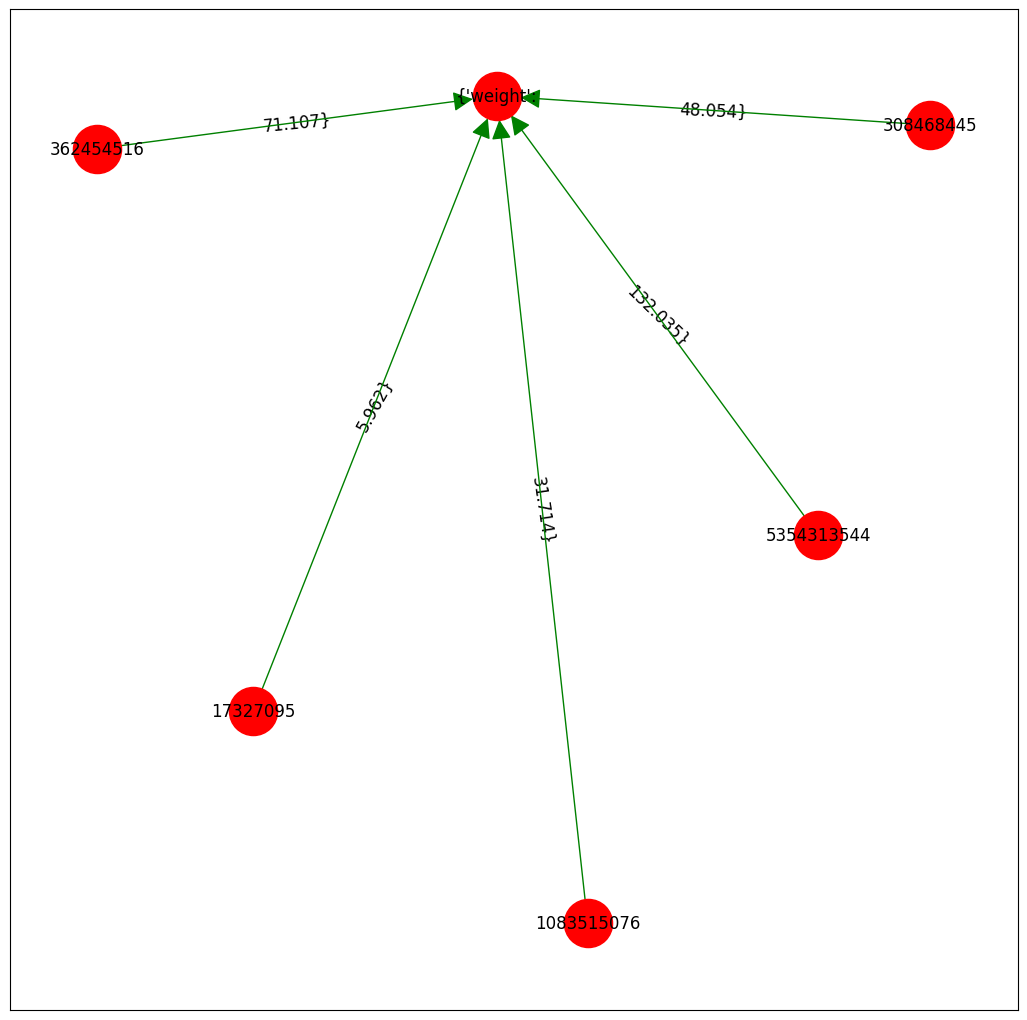

In [35]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G1)
plt.figure(figsize=(13, 13))
nx.draw_networkx_edge_labels(G1,pos=pos, edge_labels=trust, font_size= 12 )
nx.draw_networkx(G1, pos, with_labels=True, node_color='r', edge_color='g', node_size=1200, arrowsize= 30)
plt.show()

In [34]:
trust

{(1083515076, "{'weight':"): '31.714}',
 (308468445, "{'weight':"): '48.054}',
 (17327095, "{'weight':"): '5.962}',
 (362454516, "{'weight':"): '71.107}',
 (5354313544, "{'weight':"): '132.035}'}

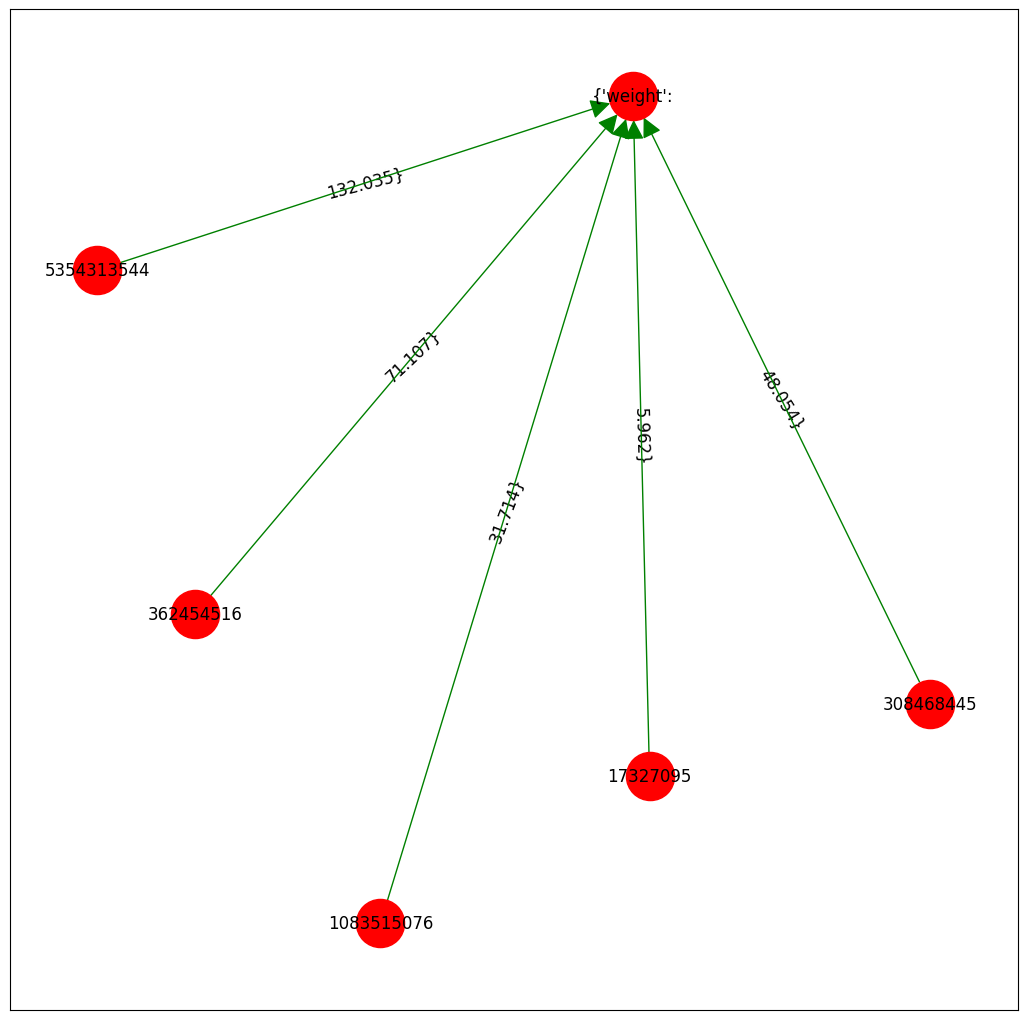

In [36]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G1)
plt.figure(figsize=(13, 13))
trust = nx.get_edge_attributes(G1, 'trust')
nx.draw_networkx_edge_labels(G1,pos=pos, edge_labels=trust, font_size= 12 )
nx.draw_networkx(G1, pos, with_labels=True, node_color='r', edge_color='g', node_size=1200, arrowsize= 30)
plt.show()

In [37]:
df.head()

,user_from,user_to,trust
248007842,1083515076,{'weight':,31.714}
248007842,308468445,{'weight':,48.054}
5354313543,17327095,{'weight':,5.962}
5354313543,362454516,{'weight':,71.107}
5354313543,5354313544,{'weight':,132.035}


In [45]:
[(248007842, 1083515076, 31.714), (248007842, 308468445, 48.054), (5354313543, 17327095,5.962), (5354313543, 362454516, 71.107), (5354313543, 5354313544, 132.035)]

[(248007842, 1083515076, 31.714),
 (248007842, 308468445, 48.054),
 (5354313543, 17327095, 5.962),
 (5354313543, 362454516, 71.107),
 (5354313543, 5354313544, 132.035)]

In [43]:
G = nx.DiGraph()
for u,v,data in graph.edges(data=True):
    w = data['length'] if 'length' in data else 0.0
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    else:
        G.add_edge(u, v, weight=w)

# print(G.edges(data=True)[5:10])
print(list(G.edges(data=True))[5:10])

[(248007842, 1083515076, {'weight': 31.714}), (248007842, 308468445, {'weight': 48.054}), (5354313543, 17327095, {'weight': 5.962}), (5354313543, 362454516, {'weight': 71.107}), (5354313543, 5354313544, {'weight': 132.035})]


In [44]:
L = [(x[0],x[1],x[2]['weight']) for x in Lw]
print(L)

[(248007842, 1083515076, 31.714), (248007842, 308468445, 48.054), (5354313543, 17327095, 5.962), (5354313543, 362454516, 71.107), (5354313543, 5354313544, 132.035)]


In [38]:
Lw= list(G.edges(data=True))[5:10]
L = [(x[0],x[1],x[2]['weight']) for x in Lw]
f = open('fileS2.txt', 'w')
for t in L :
    line = ' '.join(str(x) for x in t)
    f.write(line + '\n')
f.close()


file1 = open('fileS2.txt', 'r')
print(file1.read())
file1.close()

248007842 1083515076 31.714
248007842 308468445 48.054
5354313543 17327095 5.962
5354313543 362454516 71.107
5354313543 5354313544 132.035



In [40]:
user = ['user_from', 'user_to', 'trust']
df = pd.read_csv('C:/Users/sumed/OneDrive/Documents/Sumedh/Majorproject/routing-serv/fileS2.txt', sep= ' ', names= user )
df.head()

,user_from,user_to,trust
0,248007842,1083515076,31.714
1,248007842,308468445,48.054
2,5354313543,17327095,5.962
3,5354313543,362454516,71.107
4,5354313543,5354313544,132.035


In [41]:
G1 = nx.from_pandas_edgelist(df, source='user_from', target='user_to',edge_attr = 'trust', create_using= nx.DiGraph)

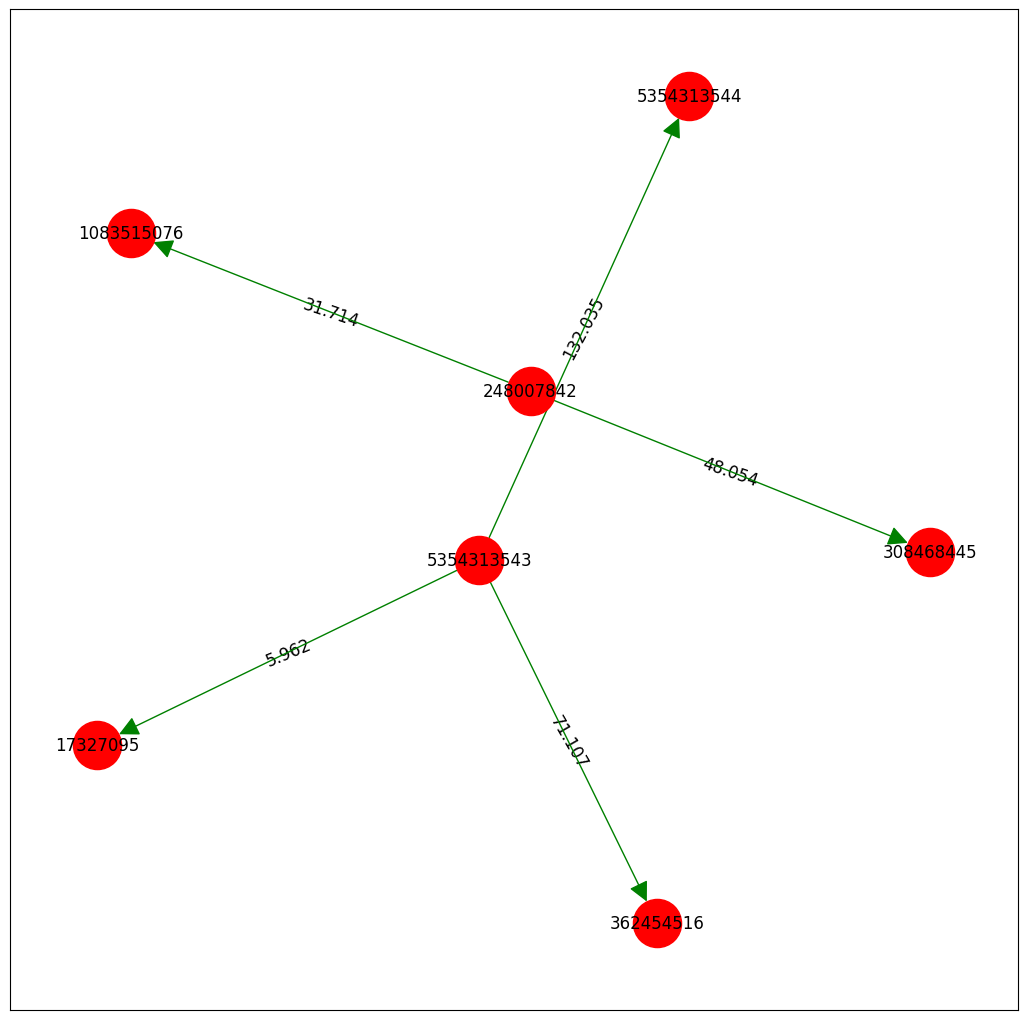

In [42]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G1)
plt.figure(figsize=(13, 13))
trust = nx.get_edge_attributes(G1, 'trust')
nx.draw_networkx_edge_labels(G1,pos=pos, edge_labels=trust, font_size= 12 )
nx.draw_networkx(G1, pos, with_labels=True, node_color='r', edge_color='g', node_size=1200, arrowsize= 30)
plt.show()